In [7]:
class Bond:
    def __init__(self,num_periods, coupon, rate, PV, FV):
        data = [num_periods, coupon, rate, PV, FV]
        if data.count('NA') > 2:
            raise Exception("Bond not created")
        else:
            self.num_periods = num_periods
            self.coupon = coupon
            self.rate = rate
            self.PV = PV
            self.FV = FV

    def calculate_bond_present_value(self):

    def calculate_bond_future_value(self):
    
    def calculate_coupon(self): 
    def calculate_rate(self):
    def calculate_numPeriods(self): 
    def get_bond_info(self):
        print("The number of period is " + self.num_periods)
        print("The coupon is " + self.coupon)
        print("The rate is " + self.rate)
        print("The present value is " + self.PV)
        print("The future value is " + self.FV)

IndentationError: expected an indented block (<ipython-input-7-f0a831d8fa3f>, line 15)

## Question 7

In [1]:
#!usr/bin/env python
#-*- coding:utf-8 -*-
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt, log

from collections import defaultdict
%matplotlib inline

In [2]:
df = pd.read_csv("GovtBond final.csv")
df = df.loc[:,"Maturity":"Price"]
df

,Maturity,Coupon Rate,Yield,Price
0,1,0,1.50,98.522167
1,2,1.25%,1.66,99.199975
2,3,3.00%,1.67,103.860352
3,4,2.88%,1.75,104.328965
4,5,3.38%,1.87,107.144257
5,6,2.38%,1.95,102.412685
6,7,2.75%,2.10,104.190670


In [3]:
s = []
for i in range(0, len(df)):
    coupon = float(df.loc[i, 'Coupon Rate'].strip('%'))
    sums = 0
    for j in range(0, i):
        sums += coupon/((1 + s[j])**df.loc[j, 'Maturity'])
    denominator = df.loc[i, 'Price'] - sums
    numerator = 100 + coupon
    spot_rate = ((numerator/denominator)**(1/df.loc[i, 'Maturity'])) - 1
    s.append(spot_rate)

for i in range(0, len(df)):
    df.loc[i, "Spot Rate"] = round(s[i]*100, 2)
    df['Prev Spot Rate'] = df['Spot Rate'].shift(1)
    

df
    

,Maturity,Coupon Rate,Yield,Price,Spot Rate,Prev Spot Rate
0,1,0,1.50,98.522167,1.50,NaN
1,2,1.25%,1.66,99.199975,1.66,1.50
2,3,3.00%,1.67,103.860352,1.67,1.66
3,4,2.88%,1.75,104.328965,1.75,1.67
4,5,3.38%,1.87,107.144257,1.88,1.75
5,6,2.38%,1.95,102.412685,1.96,1.88
6,7,2.75%,2.10,104.190670,2.13,1.96


In [4]:
df["Forward Rate"] = (((1 + df["Spot Rate"]) ** df["Maturity"]) / 
                       ((1 + df["Prev Spot Rate"]) ** (df["Maturity"] - 1)) - 1)

df

,Maturity,Coupon Rate,Yield,Price,Spot Rate,Prev Spot Rate,Forward Rate
0,1,0,1.50,98.522167,1.50,NaN,1.500000
1,2,1.25%,1.66,99.199975,1.66,1.50,1.830240
2,3,3.00%,1.67,103.860352,1.67,1.66,1.690113
3,4,2.88%,1.75,104.328965,1.75,1.67,2.004671
4,5,3.38%,1.87,107.144257,1.88,1.75,2.464429
5,6,2.38%,1.95,102.412685,1.96,1.88,2.394594
6,7,2.75%,2.10,104.190670,2.13,1.96,3.375827


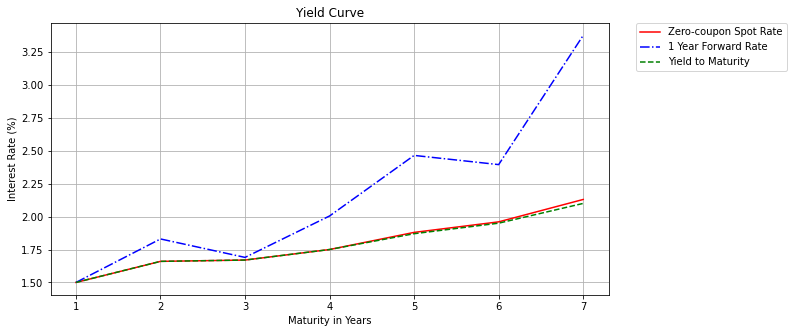

In [5]:
plt.figure(figsize=(10, 5))
plt.grid(True)
plt.plot(df['Maturity'], df['Spot Rate'], 'r-', label='Zero-coupon Spot Rate')
plt.plot(df['Maturity'], df['Forward Rate'], 'b-.', label='1 Year Forward Rate')
plt.plot(df['Maturity'], df['Yield'], 'g--', label='Yield to Maturity')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Yield Curve")
plt.ylabel("Interest Rate (%)")
plt.xlabel("Maturity in Years")
plt.show()